In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dfx = pd.read_csv("../KNN - Diabetes/Diabetes_Xtrain.csv")
dfy = pd.read_csv("../KNN - Diabetes/Diabetes_Ytrain.csv")

In [3]:
dfx.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,7,168,88,42,321,38.2,0.787,40
1,8,110,76,0,0,27.8,0.237,58
2,7,147,76,0,0,39.4,0.257,43
3,2,100,66,20,90,32.9,0.867,28
4,4,129,86,20,270,35.1,0.231,23


In [4]:
X_train = dfx.values
Y_train = dfy.values.reshape((-1,))

print(X_train.shape)
print(Y_train.shape)

(576, 8)
(576,)


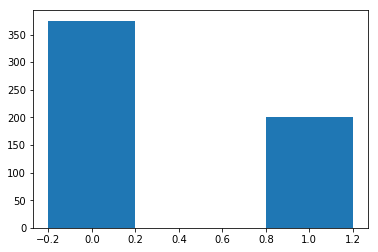

In [5]:
indices = np.unique(Y_train)
vals = np.unique(Y_train, return_counts=True)[1]

plt.bar(indices, height=vals, width=0.4)
plt.show()

In [6]:
def dist(v1, v2):
    return np.sqrt(np.sum((v1-v2)**2))

In [32]:
def knn(point, k=5):
    distances = []
    
    for i in range(X_train.shape[0]):
        d = dist(point, X_train[i])
        distances.append((d, Y_train[i]))
        
    distances = sorted(distances)
    distances = distances[:k]
    distances = np.array(distances)

    pred_labels = np.unique(distances[:, 1], return_counts=True)     # Get unique number of classes & their counts
    index = np.argmax(pred_labels[1])
#     print(distances)
    return int(pred_labels[0][index])

In [33]:
def get_accuracy():
    predictions = []
    
    for i in range(X_train.shape[0]):
        pred = knn(X_train[i])
        predictions.append(pred)
        
    predictions = np.array(predictions)
    return (np.sum(predictions == Y_train)/Y_train.shape[0])

In [34]:
get_accuracy()*100

78.99305555555556

In [10]:
for i in range(10):
    print((knn(X_train[i])), Y_train[i])

1 1
0 0
0 1
0 1
0 0
0 1
0 0
0 0
1 1
0 0


In [11]:
dfxt = pd.read_csv("../KNN - Diabetes/Diabetes_Xtest.csv")

In [12]:
dfx.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,7,168,88,42,321,38.2,0.787,40
1,8,110,76,0,0,27.8,0.237,58
2,7,147,76,0,0,39.4,0.257,43
3,2,100,66,20,90,32.9,0.867,28
4,4,129,86,20,270,35.1,0.231,23


In [13]:
dfxt.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0,180,90,26,90,36.5,0.314,35
1,2,93,64,32,160,38.0,0.674,23
2,2,114,68,22,0,28.7,0.092,25
3,13,76,60,0,0,32.8,0.180,41
4,1,80,74,11,60,30.0,0.527,22


In [14]:
X_test = dfxt.values
X_test.shape

(192, 8)

In [15]:
pred_labels = []
for i in range(X_test.shape[0]):
    p = int(knn(X_test[i]))
    pred_labels.append(p)
# print(pred_labels)

In [16]:
labels_df = pd.DataFrame(pred_labels)

In [17]:
labels_df.shape

(192, 1)

In [18]:
labels_df.to_csv("Pred_Ytest.csv", header = ["Outcome"], index = False)

In [19]:
from sklearn.neighbors import KNeighborsClassifier 

In [91]:
kn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)

In [92]:
kn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [93]:
kn.classes_

array([0, 1])

In [94]:
kn.score(X_train, Y_train)

0.7899305555555556